In [2]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import json
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [3]:
df_res = pd.read_csv("results/example_results_1735114543.csv")
df_res.columns = [c.strip() for c in df_res.columns]
df_res

,time,example,integrator,mode,result,n_integrations,logs
0,0.192162,example1.py,LatteIntegrator,SAE4WMI,1.000000,2,[]
1,0.130021,example1.py,VolestiIntegrator,SAE4WMI,1.020509,2,[]
2,2.016490,example1.py,FazaIntegrator,SAE4WMI,1.500000,2,"[{'integrand': -1.0*x, 'degree': 1, 'threshold..."
3,0.223227,example3.py,LatteIntegrator,SAE4WMI,9.000000,4,[]
4,0.149961,example3.py,VolestiIntegrator,SAE4WMI,8.599661,4,[]
5,9.181719,example3.py,FazaIntegrator,SAE4WMI,9.988281,4,"[{'integrand': 2.0*y, 'degree': 1, 'threshold'..."
6,0.213373,example5.py,LatteIntegrator,SAE4WMI,0.000000,4,[]
7,0.152441,example5.py,VolestiIntegrator,SAE4WMI,0.191230,4,[]
8,18.497399,example5.py,FazaIntegrator,SAE4WMI,0.007324,4,"[{'integrand': -1.0*x, 'degree': 1, 'threshold..."
9,0.450105,example6.py,LatteIntegrator,SAE4WMI,92.000000,9,[]


In [4]:
logs = []
parsed_logs = []
for _, row in df_res.iterrows():
    try:
        if len(row['logs']) <= 2:
            continue
        
        for l in row['logs'].strip()[2:-2].split("}, {"):
            parsed_log = {}
            for element in l.split(","):
                parsed_log[element.split(":")[0].strip()[1:-1]]=element.split(":")[1].strip()
            parsed_log['example'] = row['example']
            parsed_logs.append(parsed_log)
    except Exception as e:
        print(e,'\n', row)
df_logs = pd.DataFrame(parsed_logs).sort_values('example', ascending=True)
df_logs

,integrand,degree,threshold,max_workers,hrect_checked_num,total_solver_time,total_subs_time,example
0,-1.0*x,1,0.5,16,7,0.2721214294433594,0.07570385932922363,example1.py
1,x,1,0.5,16,7,0.19836640357971191,0.07226705551147461,example1.py
2,2.0*y,1,0.5,16,514,11.15135669708252,4.472392320632935,example3.py
3,2.0*y,1,0.5,16,408,8.763858079910278,3.561960458755493,example3.py
4,x + y,1,0.5,16,497,10.611096143722534,4.356945037841797,example3.py
...,...,...,...,...,...,...,...,...
96,3.0*x1 - 5.0*x2,1,0.5,16,2047,46.02620482444763,25.785800218582153,example_euf4.py
98,-2.0*x1 + 3.0*x2,1,0.5,16,227,5.551564693450928,6.427037477493286,example_euf4.py
94,-1.0*x1 - 5.0*x2,1,0.5,16,5315,120.28342151641846,71.45767188072205,example_euf4.py
95,-2.0*x1 - 5.0*x2,1,0.5,16,841,19.450246572494507,12.341722965240479,example_euf4.py


In [5]:
df_res[['example', 'integrator', 'result', 'time', 'mode', 'n_integrations']].sort_values(['example', 'integrator']).to_csv("results/wmipa_examples.csv", index=False)

In [6]:
df_logs[['example', 'integrand', 'degree', 'hrect_checked_num',
       'total_solver_time', 'total_subs_time','threshold', 'max_workers']].sort_values(['example', 'hrect_checked_num']).to_csv('results/wmipa_examples_logs.csv', index=False)

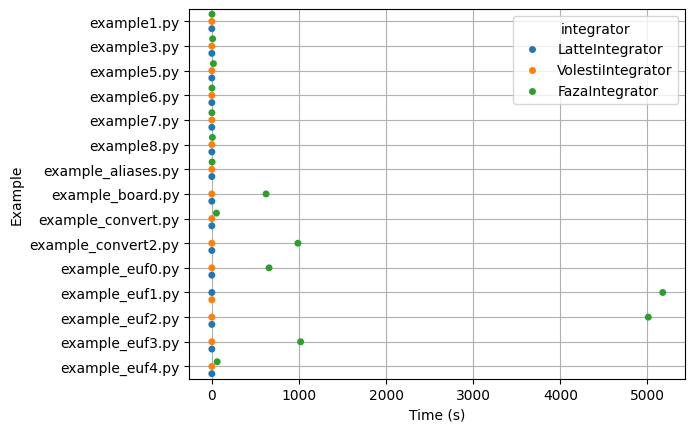

In [7]:
sns.swarmplot(data=df_res, x='time', y='example', hue='integrator')
plt.ylabel('Example')
plt.xlabel('Time (s)')
plt.grid()